**Trabalho de Deep Learning**



In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
import pathlib

import matplotlib.pyplot as plt
import seaborn as sns

print(tf.__version__)

2.3.0


In [3]:
link = "https://raw.githubusercontent.com/rmicheldev/datasets/main/MoviesOnStreamingPlatforms_updated.csv"

# Carrega o arquivo do github
rawDf = pd.read_csv(link)

In [4]:
rawDf.head(10)

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0
5,5,6,Spider-Man: Into the Spider-Verse,2018,7+,8.4,97%,1,0,0,0,0,"Bob Persichetti,Peter Ramsey,Rodney Rothman","Animation,Action,Adventure,Family,Sci-Fi",United States,"English,Spanish",117.0
6,6,7,The Pianist,2002,18+,8.5,95%,1,0,1,0,0,Roman Polanski,"Biography,Drama,Music,War","United Kingdom,France,Poland,Germany","English,German,Russian",150.0
7,7,8,Django Unchained,2012,18+,8.4,87%,1,0,0,0,0,Quentin Tarantino,"Drama,Western",United States,"English,German,French,Italian",165.0
8,8,9,Raiders of the Lost Ark,1981,7+,8.4,95%,1,0,0,0,0,Steven Spielberg,"Action,Adventure",United States,"English,German,Hebrew,Spanish,Arabic,Nepali",115.0
9,9,10,Inglourious Basterds,2009,18+,8.3,89%,1,0,0,0,0,Quentin Tarantino,"Adventure,Drama,War","Germany,United States","English,German,French,Italian",153.0


In [5]:
#Mostra os tipos de dados e categorizando as features
rawDf.dtypes

Unnamed: 0           int64
ID                   int64
Title               object
Year                 int64
Age                 object
IMDb               float64
Rotten Tomatoes     object
Netflix              int64
Hulu                 int64
Prime Video          int64
Disney+              int64
Type                 int64
Directors           object
Genres              object
Country             object
Language            object
Runtime            float64
dtype: object

* Unnamed: 0           int64   Numerical
* ID                   int64   Numerical 
* Title               object   ????
* Year                 int64   Numerical 
* Age                 object   Categorical
* IMDb               float64   Numerical
* Rotten Tomatoes     object   Numerical
* Netflix              int64   Categorical
* Hulu                 int64   Categorical
* Prime Video          int64   Categorical
* Disney+              int64   Categorical
* Type                 int64   Categorical
* Directors           object   Categorical
* Genres              object   Categorical 
* Country             object   Categorical
* Language            object   Categorical 
* Runtime            float64   Numerical

In [6]:
# Remove a primeira coluna (indice 0) que não possui valor e a coluna Type e a nota no Rotten Tomatoes 
explDf = rawDf.drop(rawDf.columns[[0]], axis=1).drop(['Type','Rotten Tomatoes'], axis=1)
explDf.head(10)

,ID,Title,Year,Age,IMDb,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language,Runtime
0,1,Inception,2010,13+,8.8,1,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,2,The Matrix,1999,18+,8.7,1,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,3,Avengers: Infinity War,2018,13+,8.5,1,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,4,Back to the Future,1985,7+,8.5,1,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,1,0,1,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0
5,6,Spider-Man: Into the Spider-Verse,2018,7+,8.4,1,0,0,0,"Bob Persichetti,Peter Ramsey,Rodney Rothman","Animation,Action,Adventure,Family,Sci-Fi",United States,"English,Spanish",117.0
6,7,The Pianist,2002,18+,8.5,1,0,1,0,Roman Polanski,"Biography,Drama,Music,War","United Kingdom,France,Poland,Germany","English,German,Russian",150.0
7,8,Django Unchained,2012,18+,8.4,1,0,0,0,Quentin Tarantino,"Drama,Western",United States,"English,German,French,Italian",165.0
8,9,Raiders of the Lost Ark,1981,7+,8.4,1,0,0,0,Steven Spielberg,"Action,Adventure",United States,"English,German,Hebrew,Spanish,Arabic,Nepali",115.0
9,10,Inglourious Basterds,2009,18+,8.3,1,0,0,0,Quentin Tarantino,"Adventure,Drama,War","Germany,United States","English,German,French,Italian",153.0


In [7]:
# Dropa todas as linhas que tem colunas faltando informação 
explDf = explDf.dropna()
display(explDf)

,ID,Title,Year,Age,IMDb,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language,Runtime
0,1,Inception,2010,13+,8.8,1,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,2,The Matrix,1999,18+,8.7,1,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,3,Avengers: Infinity War,2018,13+,8.5,1,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,4,Back to the Future,1985,7+,8.5,1,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,1,0,1,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16726,16727,Richie Rich's Christmas Wish,1998,all,4.1,0,0,0,1,John Murlowski,"Comedy,Family",United States,English,84.0
16727,16728,The Jungle Book: Mowgli's Story,1998,all,4.2,0,0,0,1,Nick Marck,"Adventure,Family",United States,English,77.0
16737,16738,The Bears and I,1974,all,6.2,0,0,0,1,Bernard McEveety,"Drama,Family",United States,English,89.0
16738,16739,Whispers: An Elephant's Tale,2000,all,5.0,0,0,0,1,Dereck Joubert,"Adventure,Family",United States,English,72.0


In [8]:
rawDf.head(10)

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0
5,5,6,Spider-Man: Into the Spider-Verse,2018,7+,8.4,97%,1,0,0,0,0,"Bob Persichetti,Peter Ramsey,Rodney Rothman","Animation,Action,Adventure,Family,Sci-Fi",United States,"English,Spanish",117.0
6,6,7,The Pianist,2002,18+,8.5,95%,1,0,1,0,0,Roman Polanski,"Biography,Drama,Music,War","United Kingdom,France,Poland,Germany","English,German,Russian",150.0
7,7,8,Django Unchained,2012,18+,8.4,87%,1,0,0,0,0,Quentin Tarantino,"Drama,Western",United States,"English,German,French,Italian",165.0
8,8,9,Raiders of the Lost Ark,1981,7+,8.4,95%,1,0,0,0,0,Steven Spielberg,"Action,Adventure",United States,"English,German,Hebrew,Spanish,Arabic,Nepali",115.0
9,9,10,Inglourious Basterds,2009,18+,8.3,89%,1,0,0,0,0,Quentin Tarantino,"Adventure,Drama,War","Germany,United States","English,German,French,Italian",153.0


In [9]:
explDf.head(10)

,ID,Title,Year,Age,IMDb,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language,Runtime
0,1,Inception,2010,13+,8.8,1,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,2,The Matrix,1999,18+,8.7,1,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,3,Avengers: Infinity War,2018,13+,8.5,1,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,4,Back to the Future,1985,7+,8.5,1,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,1,0,1,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0
5,6,Spider-Man: Into the Spider-Verse,2018,7+,8.4,1,0,0,0,"Bob Persichetti,Peter Ramsey,Rodney Rothman","Animation,Action,Adventure,Family,Sci-Fi",United States,"English,Spanish",117.0
6,7,The Pianist,2002,18+,8.5,1,0,1,0,Roman Polanski,"Biography,Drama,Music,War","United Kingdom,France,Poland,Germany","English,German,Russian",150.0
7,8,Django Unchained,2012,18+,8.4,1,0,0,0,Quentin Tarantino,"Drama,Western",United States,"English,German,French,Italian",165.0
8,9,Raiders of the Lost Ark,1981,7+,8.4,1,0,0,0,Steven Spielberg,"Action,Adventure",United States,"English,German,Hebrew,Spanish,Arabic,Nepali",115.0
9,10,Inglourious Basterds,2009,18+,8.3,1,0,0,0,Quentin Tarantino,"Adventure,Drama,War","Germany,United States","English,German,French,Italian",153.0


In [10]:
#renomeando colunas
colsRen = {'ID':'id',
        'Title':'title',
        'Year':'year',
        'Age':'age',
        'IMDb':'imdb',        
        'Netflix':'netflix',
        'Hulu':'hulu',
        'Prime Video':'prime',
        'Disney+':'disney',        
        'Directors':'directors',
        'Genres':'genres',
        'Country':'country',
        'Language':'language',
        'Runtime':'runtime'
        }


explDf = explDf.rename(columns = colsRen, inplace = False)
explDf.dtypes

id             int64
title         object
year           int64
age           object
imdb         float64
netflix        int64
hulu           int64
prime          int64
disney         int64
directors     object
genres        object
country       object
language      object
runtime      float64
dtype: object

In [11]:
#Dividindo os dados para treino e teste (validação)
testeDf = explDf.sample(frac=0.2, random_state=42)
treinoDf = explDf.drop(testeDf.index)

print("%d amostras para treino e %d para teste" % (len(treinoDf),len(testeDf)))

5637 amostras para treino e 1409 para teste


In [12]:
def dataframe_to_dataset(dataframe):
    dataframe = dataframe.copy()
    labels = dataframe.pop("imdb")
    ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
    ds = ds.shuffle(buffer_size=len(dataframe))
    return ds

In [13]:
treinoDs = dataframe_to_dataset(treinoDf)
testeDs = dataframe_to_dataset(testeDf)

In [14]:
#Estrutura do dataset
treinoDs.element_spec

({'age': TensorSpec(shape=(), dtype=tf.string, name=None),
  'country': TensorSpec(shape=(), dtype=tf.string, name=None),
  'directors': TensorSpec(shape=(), dtype=tf.string, name=None),
  'disney': TensorSpec(shape=(), dtype=tf.int64, name=None),
  'genres': TensorSpec(shape=(), dtype=tf.string, name=None),
  'hulu': TensorSpec(shape=(), dtype=tf.int64, name=None),
  'id': TensorSpec(shape=(), dtype=tf.int64, name=None),
  'language': TensorSpec(shape=(), dtype=tf.string, name=None),
  'netflix': TensorSpec(shape=(), dtype=tf.int64, name=None),
  'prime': TensorSpec(shape=(), dtype=tf.int64, name=None),
  'runtime': TensorSpec(shape=(), dtype=tf.float64, name=None),
  'title': TensorSpec(shape=(), dtype=tf.string, name=None),
  'year': TensorSpec(shape=(), dtype=tf.int64, name=None)},
 TensorSpec(shape=(), dtype=tf.float64, name=None))

In [15]:
testeDs.element_spec

({'age': TensorSpec(shape=(), dtype=tf.string, name=None),
  'country': TensorSpec(shape=(), dtype=tf.string, name=None),
  'directors': TensorSpec(shape=(), dtype=tf.string, name=None),
  'disney': TensorSpec(shape=(), dtype=tf.int64, name=None),
  'genres': TensorSpec(shape=(), dtype=tf.string, name=None),
  'hulu': TensorSpec(shape=(), dtype=tf.int64, name=None),
  'id': TensorSpec(shape=(), dtype=tf.int64, name=None),
  'language': TensorSpec(shape=(), dtype=tf.string, name=None),
  'netflix': TensorSpec(shape=(), dtype=tf.int64, name=None),
  'prime': TensorSpec(shape=(), dtype=tf.int64, name=None),
  'runtime': TensorSpec(shape=(), dtype=tf.float64, name=None),
  'title': TensorSpec(shape=(), dtype=tf.string, name=None),
  'year': TensorSpec(shape=(), dtype=tf.int64, name=None)},
 TensorSpec(shape=(), dtype=tf.float64, name=None))

In [16]:
for x, y in treinoDs.take(2):
    print("Input:", x)
    print("Target:", y)

Input: {'id': <tf.Tensor: shape=(), dtype=int64, numpy=16474>, 'title': <tf.Tensor: shape=(), dtype=string, numpy=b'Herbie Fully Loaded'>, 'year': <tf.Tensor: shape=(), dtype=int64, numpy=2005>, 'age': <tf.Tensor: shape=(), dtype=string, numpy=b'all'>, 'netflix': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'hulu': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'prime': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'disney': <tf.Tensor: shape=(), dtype=int64, numpy=1>, 'directors': <tf.Tensor: shape=(), dtype=string, numpy=b'Angela Robinson'>, 'genres': <tf.Tensor: shape=(), dtype=string, numpy=b'Adventure,Comedy,Family,Fantasy,Romance,Sport'>, 'country': <tf.Tensor: shape=(), dtype=string, numpy=b'United States'>, 'language': <tf.Tensor: shape=(), dtype=string, numpy=b'English'>, 'runtime': <tf.Tensor: shape=(), dtype=float64, numpy=101.0>}
Target: tf.Tensor(4.8, shape=(), dtype=float64)
Input: {'id': <tf.Tensor: shape=(), dtype=int64, numpy=9486>, 'title': <tf.Tensor: shape=(), dtype=st

In [17]:
treinoDs = treinoDs.batch(32)
testeDs = testeDs.batch(32)

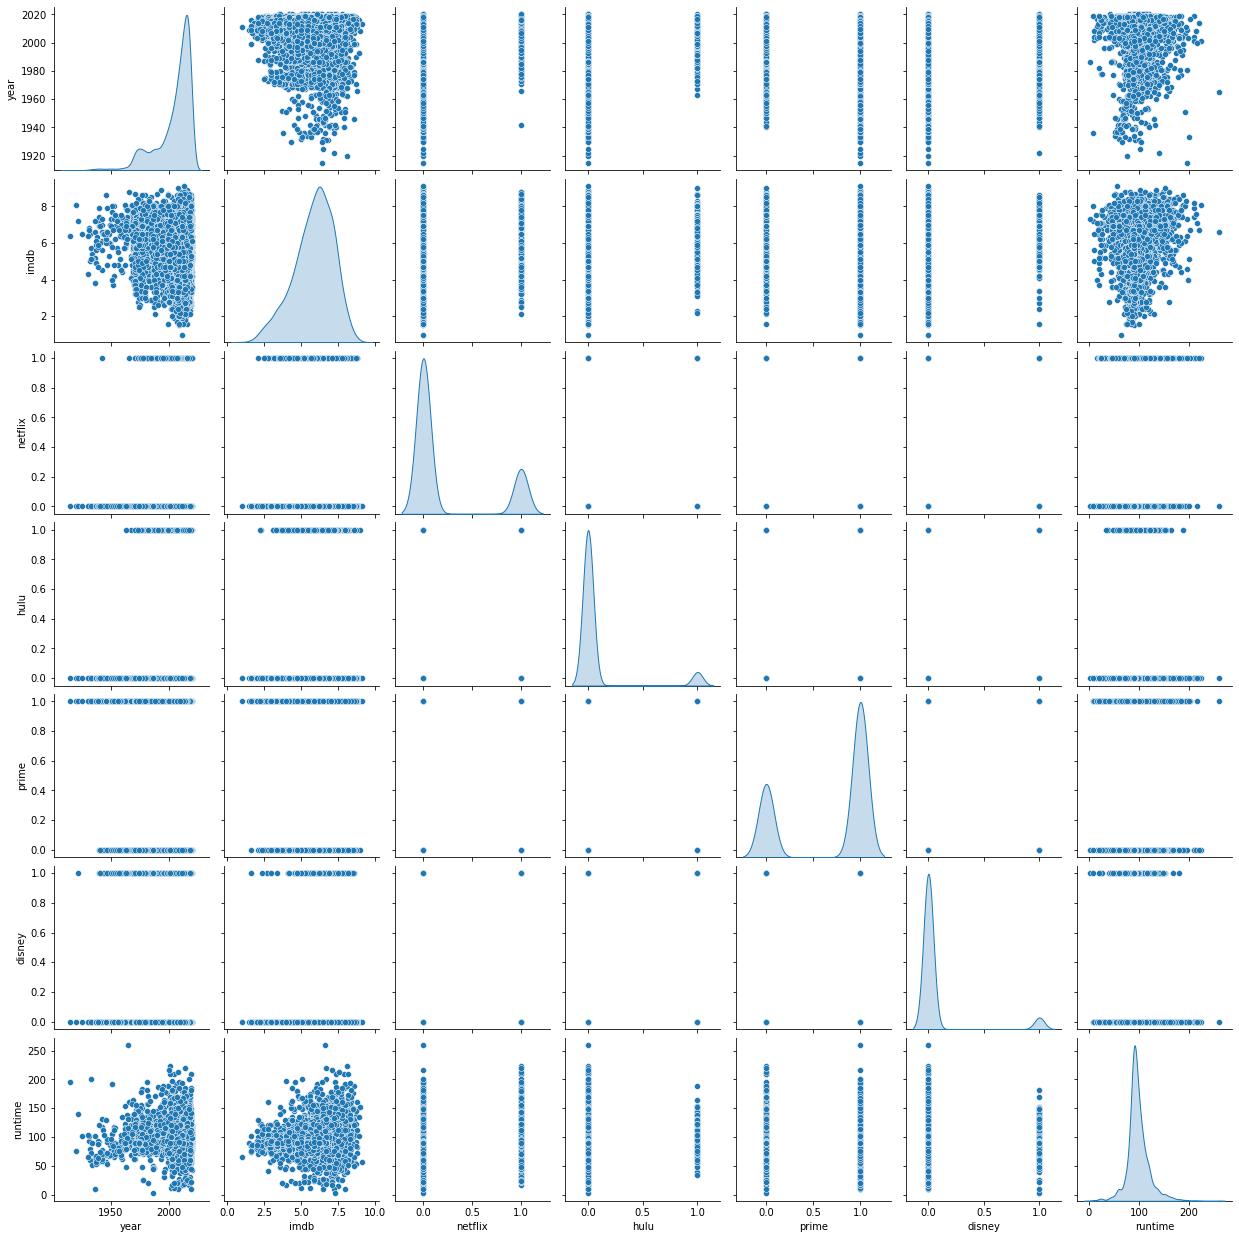

In [18]:
sns.pairplot(treinoDf[["year","age","imdb","netflix","hulu","prime","disney","directors","genres","country","language","runtime"]], diag_kind="kde")



In [19]:
# código retirado de https://keras.io/examples/structured_data/structured_data_classification_from_scratch/
from tensorflow.keras.layers.experimental.preprocessing import Normalization
from tensorflow.keras.layers.experimental.preprocessing import CategoryEncoding
from tensorflow.keras.layers.experimental.preprocessing import StringLookup


def encode_numerical_feature(feature, name, dataset):
    # Create a Normalization layer for our feature
    normalizer = Normalization()

    # Prepare a Dataset that only yields our feature
    feature_ds = dataset.map(lambda x, y: x[name])
    feature_ds = feature_ds.map(lambda x: tf.expand_dims(x, -1))

    # Learn the statistics of the data
    normalizer.adapt(feature_ds)

    # Normalize the input feature
    encoded_feature = normalizer(feature)
    return encoded_feature


def encode_string_categorical_feature(feature, name, dataset):
    # Create a StringLookup layer which will turn strings into integer indices
    index = StringLookup()

    # Prepare a Dataset that only yields our feature
    feature_ds = dataset.map(lambda x, y: x[name])
    feature_ds = feature_ds.map(lambda x: tf.expand_dims(x, -1))

    # Learn the set of possible string values and assign them a fixed integer index
    index.adapt(feature_ds)

    # Turn the string input into integer indices
    encoded_feature = index(feature)

    # Create a CategoryEncoding for our integer indices
    encoder = CategoryEncoding(output_mode="binary")

    # Prepare a dataset of indices
    feature_ds = feature_ds.map(index)

    # Learn the space of possible indices
    encoder.adapt(feature_ds)

    # Apply one-hot encoding to our indices
    encoded_feature = encoder(encoded_feature)
    return encoded_feature


def encode_integer_categorical_feature(feature, name, dataset):
    # Create a CategoryEncoding for our integer indices
    encoder = CategoryEncoding(output_mode="binary")

    # Prepare a Dataset that only yields our feature
    feature_ds = dataset.map(lambda x, y: x[name])
    feature_ds = feature_ds.map(lambda x: tf.expand_dims(x, -1))

    # Learn the space of possible indices
    encoder.adapt(feature_ds)

    # Apply one-hot encoding to our indices
    encoded_feature = encoder(feature)
    return encoded_feature


In [20]:
shp = (1,)

year =  keras.Input(shape=shp,name="year", dtype="int64") 
netflix =  keras.Input(shape=shp,name="netflix", dtype="int64")
hulu =  keras.Input(shape=shp,name="hulu", dtype="int64") 
prime =  keras.Input(shape=shp,name="prime", dtype="int64")
disney =  keras.Input(shape=shp,name="disney", dtype="int64")

runtime = keras.Input(shape=shp,name="runtime")

age = keras.Input(shape=shp,name="age", dtype="string")
directors = keras.Input(shape=shp,name="directors", dtype="string")
genres = keras.Input(shape=shp,name="genres", dtype="string")
country = keras.Input(shape=shp,name="country", dtype="string")
language = keras.Input(shape=shp,name="language", dtype="string")

In [21]:
all_inputs = [
year,
netflix,
hulu,
prime,
disney,
runtime,
age,
directors,
genres,
country,
language
]

In [22]:
year_encoded = encode_integer_categorical_feature(year, "year", treinoDs)
netflix_encoded = encode_integer_categorical_feature(netflix, "netflix", treinoDs)
hulu_encoded = encode_integer_categorical_feature(hulu, "hulu", treinoDs)
prime_encoded = encode_integer_categorical_feature(prime, "prime", treinoDs)
disney_encoded = encode_integer_categorical_feature(disney, "disney", treinoDs)

runtime_encoded = encode_numerical_feature(runtime, "runtime", treinoDs)

age_encoded = encode_string_categorical_feature(age, "age", treinoDs)
directors_encoded = encode_string_categorical_feature(directors, "directors", treinoDs)
genres_encoded = encode_string_categorical_feature(genres, "genres", treinoDs)
country_encoded = encode_string_categorical_feature(country, "country", treinoDs)
language_encoded = encode_string_categorical_feature(language, "language", treinoDs)

In [23]:
all_features = layers.concatenate(
    [
     year_encoded,
     netflix_encoded,
     hulu_encoded,
     prime_encoded,
     disney_encoded,

     runtime_encoded,

     age_encoded,
     directors_encoded,
     genres_encoded,
     country_encoded,
     language_encoded   
    ]
)

In [24]:
x = layers.Dense(64, activation="relu")(all_features)
x = layers.Dense(64, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
output = layers.Dense(1, activation="linear")(x)
model = keras.Model(all_inputs, output)
model.compile(optimizer="adam", loss="mse", metrics=['mse','mae'])

In [25]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
age (InputLayer)                [(None, 1)]          0                                            
__________________________________________________________________________________________________
directors (InputLayer)          [(None, 1)]          0                                            
__________________________________________________________________________________________________
genres (InputLayer)             [(None, 1)]          0                                            
__________________________________________________________________________________________________
country (InputLayer)            [(None, 1)]          0                                            
_______________________________________________________________________________________

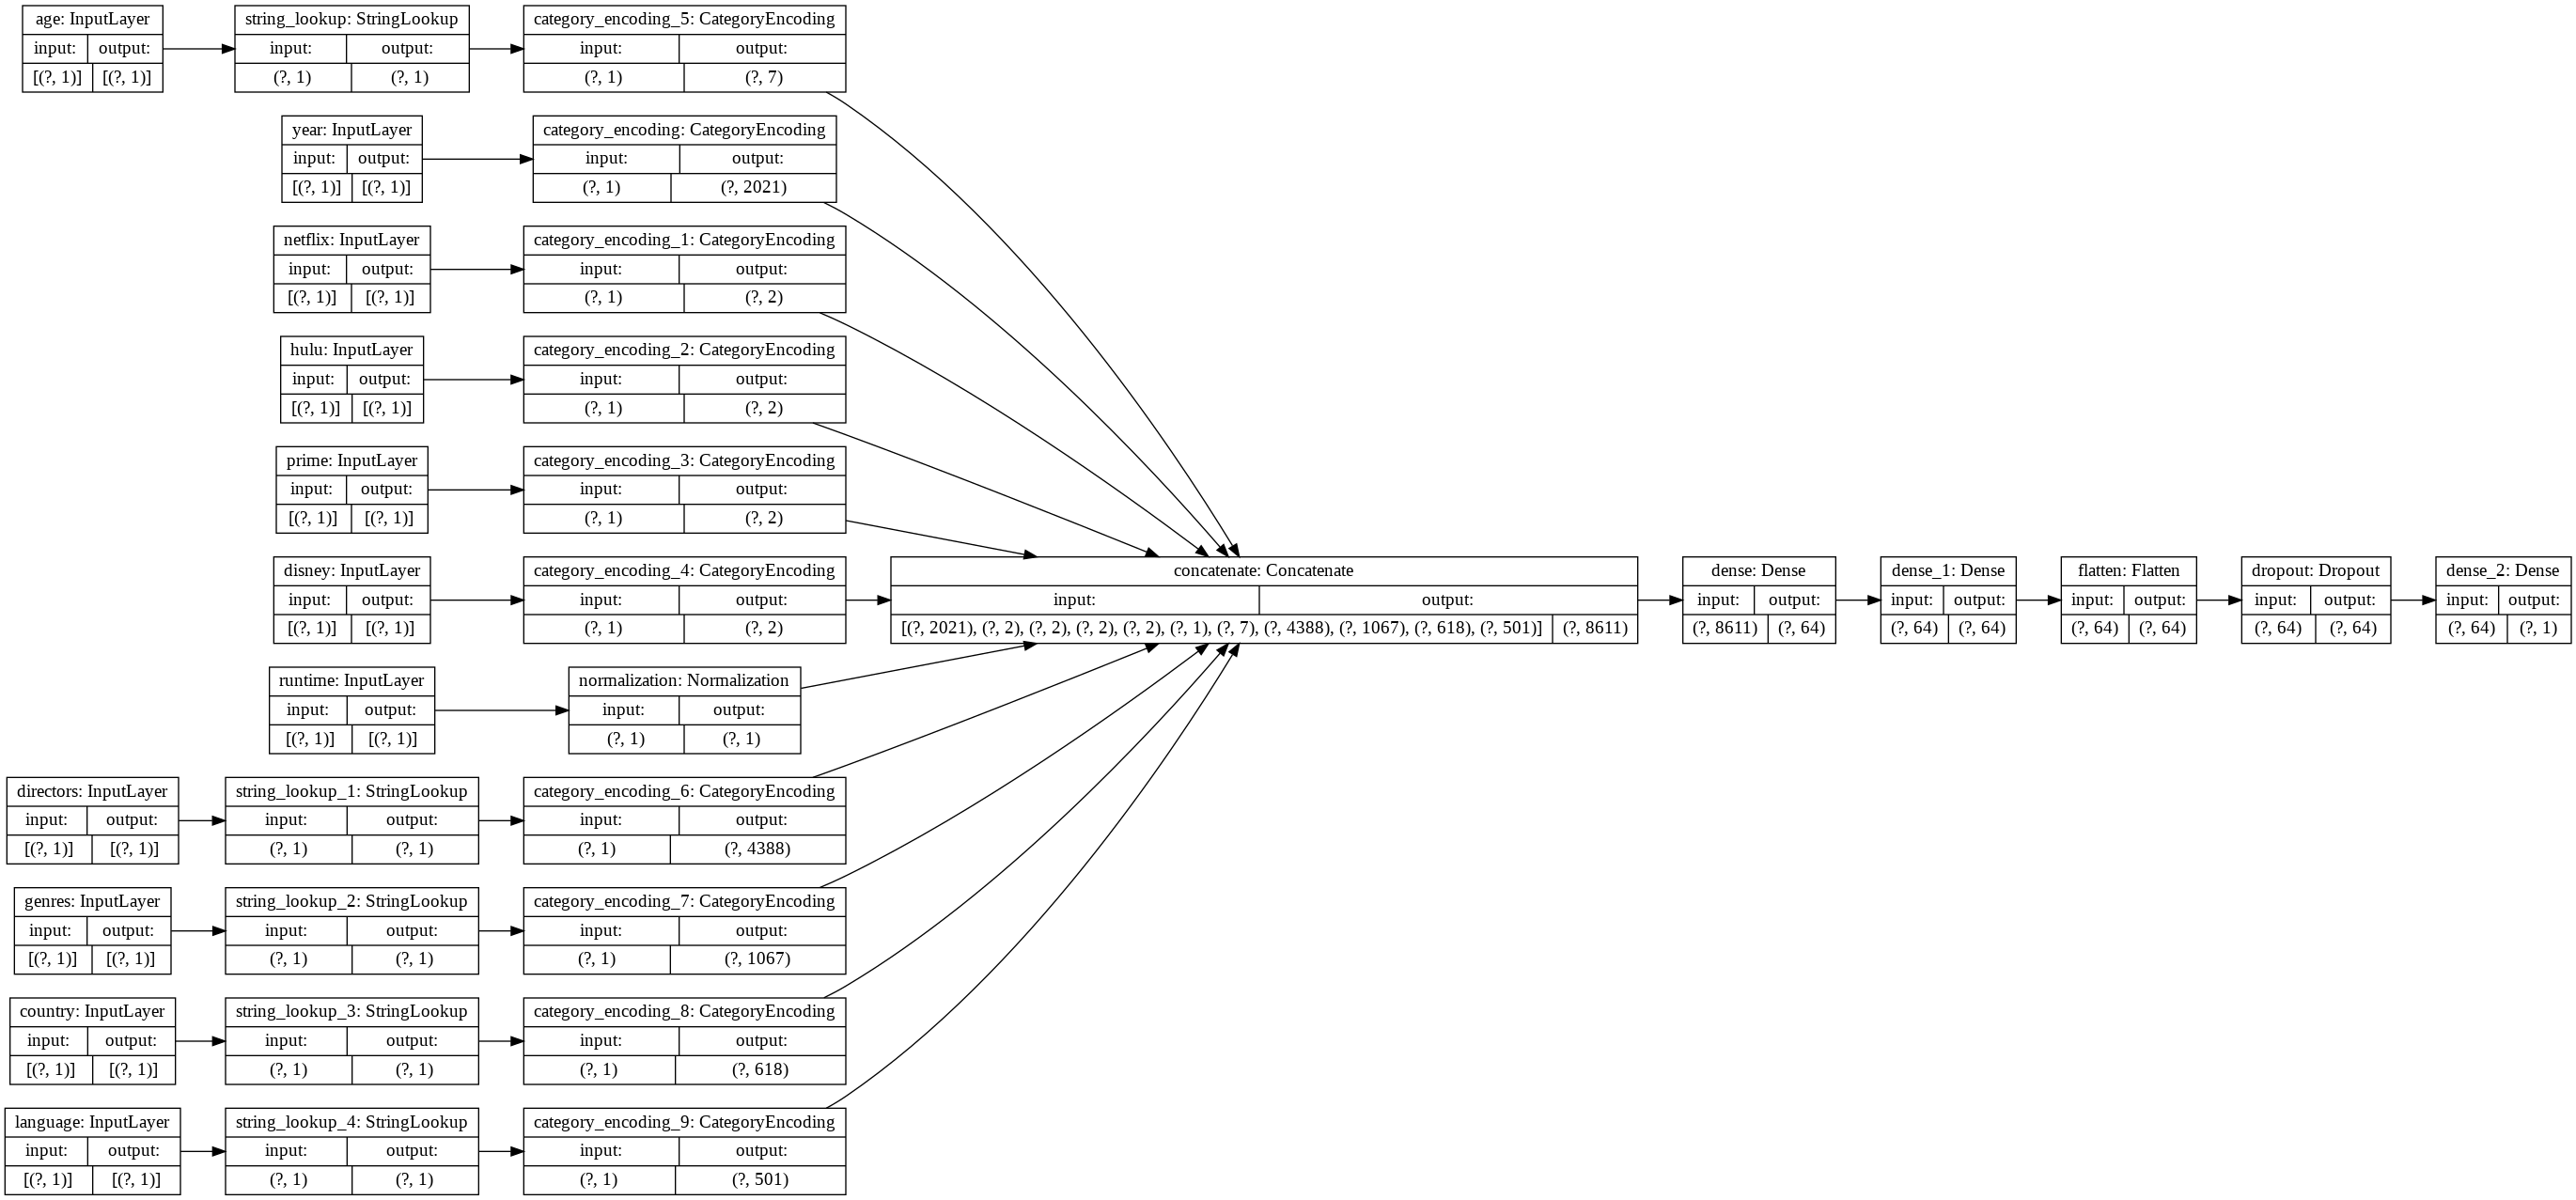

In [26]:
keras.utils.plot_model(model, show_shapes=True, rankdir="LR")

In [27]:
history = model.fit(treinoDs, epochs=50, validation_data=testeDs)

Epoch 1/50


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/functional.py:543: UserWarning: Input dict contained keys ['id', 'title'] which did not match any model input. They will be ignored by the model.
  [n for n in tensors.keys() if n not in ref_input_names])


177/177 [==============================] - 2s 9ms/step - loss: 7.3753 - mse: 7.3753 - mae: 2.0510 - val_loss: 1.3660 - val_mse: 1.3660 - val_mae: 0.9520
Epoch 2/50
177/177 [==============================] - 1s 7ms/step - loss: 2.0129 - mse: 2.0129 - mae: 1.1372 - val_loss: 1.2537 - val_mse: 1.2537 - val_mae: 0.8973
Epoch 3/50
177/177 [==============================] - 1s 7ms/step - loss: 1.7782 - mse: 1.7782 - mae: 1.0557 - val_loss: 1.2376 - val_mse: 1.2376 - val_mae: 0.8873
Epoch 4/50
177/177 [==============================] - 1s 7ms/step - loss: 1.5984 - mse: 1.5984 - mae: 1.0059 - val_loss: 1.2373 - val_mse: 1.2373 - val_mae: 0.8840
Epoch 5/50
177/177 [==============================] - 1s 7ms/step - loss: 1.4864 - mse: 1.4864 - mae: 0.9697 - val_loss: 1.2983 - val_mse: 1.2983 - val_mae: 0.9158
Epoch 6/50
177/177 [==============================] - 1s 7ms/step - loss: 1.3725 - mse: 1.3725 - mae: 0.9185 - val_loss: 1.3445 - val_mse: 1.3445 - val_mae: 0.9286
Epoch 7/50
177/177 [=======

In [28]:
histDf = pd.DataFrame(history.history)
display(histDf)

,loss,mse,mae,val_loss,val_mse,val_mae
0,7.375343,7.375343,2.050965,1.366030,1.366030,0.952032
1,2.012907,2.012907,1.137191,1.253689,1.253689,0.897302
2,1.778209,1.778209,1.055745,1.237570,1.237570,0.887289
3,1.598426,1.598426,1.005886,1.237261,1.237261,0.884049
4,1.486429,1.486429,0.969679,1.298287,1.298287,0.915771
5,1.372474,1.372474,0.918478,1.344536,1.344536,0.928563
6,1.319365,1.319365,0.906261,1.353371,1.353371,0.930445
7,1.269556,1.269556,0.889110,1.324684,1.324684,0.915686
8,1.273373,1.273373,0.890110,1.273326,1.273326,0.898824
9,1.228141,1.228141,0.868677,1.303299,1.303299,0.909232


In [29]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Metrics')
  plt.plot(hist['epoch'],hist['val_loss'],label='loss')  
  plt.plot(hist['epoch'],hist['val_mae'],label = 'mae')
  plt.plot(hist['epoch'],hist['val_mse'],label = 'mse')
  plt.ylim([0,2])
  plt.legend()
  plt.show()

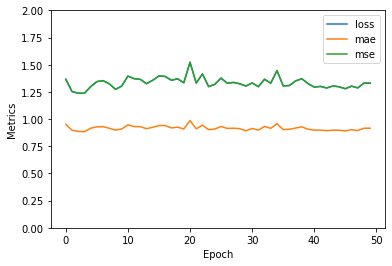

In [30]:
plot_history(history)

In [31]:
# Testando com o filme Inception imdb original = 8.8
sampleRec = {
    "year": 2010,
    "age": "13+",
    "netflix": 1,
    "hulu": 0,
    "prime": 0,
    "disney": 0,
    "directors": "Christopher Nolan",
    "genres": "Action,Adventure,Sci-Fi,Thriller",
    "country": "United States,United Kingdom",
    "language": "English,Japanese,French",
    "runtime": 148.0
}


#Testando com o filme Furie imdb original = 5.8
sampleNotRec = {
    "year": 2019,
    "age": "18+",
    "netflix": 1,
    "hulu": 0,
    "prime": 0,
    "disney": 0,
    "directors": "David Ayer",
    "genres": "Action,Drama,War",
    "country": "United States,China,United Kingdom",
    "language": "English,German",
    "runtime": 134.0
}

In [32]:
type(sampleRec)

dict

In [33]:
input_dictRec = {name: tf.convert_to_tensor([value]) for name, value in sampleRec.items()}
predictionsRec = model.predict(input_dictRec)

In [34]:
print(
    "A nota predita para este filme é %.1f" % (predictionsRec[0][0])
)

A nota predita para este filme é 7.9


In [35]:
input_dictNotRec = {name: tf.convert_to_tensor([value]) for name, value in sampleNotRec.items()}
predictionsNotRec = model.predict(input_dictNotRec)

In [36]:
print(
    "A nota predita para este filme é %.1f" % (predictionsNotRec[0][0])
)

A nota predita para este filme é 5.8


In [48]:
# Gerando um dataframe comparando as notas imdb com a gerada pela rede neural
amostra = testeDf.sample(20).to_dict(orient='records')

resultDict = {
    "title" : [],
    "imdb" : [],
    "imdb_predict": [],
    "diff" : []
}

In [49]:
for movie in amostra:
    resultDict["title"].append(movie["title"])
    resultDict["imdb"].append(movie["imdb"])  
    amostraInput = {name: tf.convert_to_tensor([value]) for name, value in movie.items()}
    pred = model.predict(amostraInput)
    resultDict["imdb_predict"].append( round(pred[0][0],1))     
    resultDict["diff"].append(round(movie["imdb"] - pred[0][0],1))     



In [50]:
resultdf = pd.DataFrame(resultDict, columns = ['title', 'imdb','imdb_predict','diff'])

In [51]:
resultdf.head(20)

,title,imdb,imdb_predict,diff
0,Planet 51,6.0,6.0,0.0
1,Secret in Their Eyes,6.3,6.0,0.3
2,Bathtubs Over Broadway,7.5,5.5,2.0
3,Gantz:O,7.1,6.1,1.0
4,Sword Art Online: The Movie - Ordinal Scale,7.4,6.8,0.6
5,Raising Flagg,5.4,5.2,0.2
6,Double Mommy,6.1,5.6,0.5
7,Bryan Callen: Never Grow Up,6.9,5.1,1.8
8,The Last Man,3.8,4.9,-1.1
9,Grandpa's Psycho,3.4,4.6,-1.2
